# Определение перспективного тарифа для телеком-компании

**СОДЕРЖАНИЕ**
1. [Описание проекта](#start)
2. [Изучение общей информации](#info)
3. [Предобработка данных](#prep)
4. [Создание общей таблицы и расчеты](#table)
5. [Анализ данных](#analize)
6. [Проверка гипотез](#hyp)    
7. [Общий вывод](#end)    

<a id="start"></a>
## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**


**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика\
Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика\
Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

<a id="info"></a>
## Изучение общей информации

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')                       
users = pd.read_csv('/datasets/users.csv')

Посмотрим на данные

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


**Проверим на аномалии столбец "mb_used".**

''

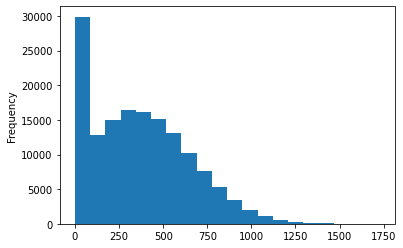

In [8]:
internet['mb_used'].plot(kind='hist', bins=20)
;

**Вывод**
Виден всплеск на нулевых сессиях. Причины могли быть разные - клиенты пытались выйти в интернет, но не смогли, происходил обрыв сессий и звонков. Возможно, стоило бы обратиться с этим к тех. поддержке после более детального исследования: город, время, клиенты, у которых произошел сбой.

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

Итак, у нас есть 5 датасетов.
* Первый датасет **calls** содержит информацию о звонках. В нем 4 колонки.\
 `id` - уникальный номер звонка (***object***)\
 `call_date`- дата звонка (***object***)\
 `duration` - длительность звонка в минутах (***float64***)\
 `user_id` - идентификатор пользователя, сделавшего звонок (***int64***).
 

* Датасет **internet** содержит информацию об использованном трафике интернета пользователем. В нем 5 столбцов.\
  `Unnamed: 0`- непонятный столбец, дублирует индексы\
  `id` - уникальный номер сессии(***object***)\
  `mb_used` - объём потраченного за сессию интернет-трафика (в мегабайтах) (***float64***)\
  `session_date` - дата интернет-сессии (***object***)\
  `user_id` - идентификатор пользователя (***int64***).
   

* Датасет **messages** содержит информацию об смс. В нем 3 колонки.\
 `id` - уникальный номер сообщения (***object***)\
 `message_date` - дата сообщения (***object***)\
 `user_id` - идентификатор пользователя, отправившего сообщение (***int64***).
 

* Датасет **tariffs** содержит информацию о тарифах. В нем 8 колонок и 2 строки.\  
 `messages_included` - количество сообщений в месяц, включённых в абонентскую плату (***int64***)\
 `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) (***int64***)\
 `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату (***int64***)\
 `rub_monthly_fee` - ежемесячная абонентская плата в рублях (***int64***)\
 `rub_per_gb`- стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета  (***int64***)\
 `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета (***int64***)\
 `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета (***int64***)\
 `tariff_name` - название тарифа (***object***).


* Датасет **users** содержит информацию о пользователях. В нем 8 колонок.\
 `user_id` - уникальный идентификатор пользователя (***int64***)\
 `age` - возраст пользователя (годы) (***int64***)\
 `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) (***object***)\
 `city` - город проживания пользователя (***object***)\
 `first_name` - имя пользователя (***object***)\
 `last_name` - фамилия пользователя (***object***)\
 `reg_date` - дата подключения тарифа (день, месяц, год) (***object***)\
 `tariff` - название тарифного плана (***object***).
 
 В таблице **users** в колонке `churn_date` есть пропущенные значения. Кроме того, надо привести данные в некоторых колонках к нужному типу. Например, колонки, которые содержат даты: `call_date` в **calls**, `session_date`в **internet**, `message_date` в **messages**, `churn_date` в **users** - надо перевести тип данных в этих колонках в **datetime64**. 

<a id="prep"></a>
## Предобработка данных

### Переименование колонки

Колонку `tariff_name` в таблице **tariffs** переименуем в `tariff`, это нам понадобится в дальнейшем при объединении датасетов.

In [15]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Работа с пропусками

В столбце `churn_date` указана дата прекращения тарифом. Пропуск в этом столбце означает, что тариф на момент выгрузки данных еще действовал. Заполнять его я пока не буду. 

In [16]:
users['churn_date'].isnull().sum()

462

### Изменение типа данных

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M')

**Вывод**:\
Перевела все столбцы с датами во всех датасетах в правильный тип: **datetime64**.

### Проверка на явные дупликаты

In [18]:
users.duplicated().sum()

0

In [19]:
calls.duplicated().sum()

0

In [20]:
internet.duplicated().sum()

0

In [21]:
messages.duplicated().sum()

0

Проверю еще, на всякий случай, в таблице **users** колонку `city` на наличие неявных дубликатов.  

In [22]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

**Вывод**\
Явных дупликатов ни в одной из таблиц нет. В столбце `city` также все хорошо. Можно продолжать исследование.

<a id="table"></a>
## Создание общей таблицы и расчеты

В описании к тарифам сказано,что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.\
   Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.
Учитывая это, в столбце `duration` таблицы **calls** округлим все значения в большую сторону.
В таблице **internet** сначала сгруппируем данные по траффику помесячно для каждого пользователя, а переводить данные в гигабайты и делать округление будем уже при подсчетах.

In [23]:
calls['duration'] = np.ceil(calls.duration).astype('int')

In [24]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Сделаем колонку с месяцем `month` в таблицах **calls**, **internet** и **messages**. Создадим 3 сгруппированных датасетов по столбцам `user_id` и `month`. Потом из них соберем общий датасет. 

In [25]:
# Из колонки "дата звонка" выделяю месяц и создаю новый столбец "month"
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [26]:
# Создаю сгруппированную по id пользователя и месяцу таблицу, где подсчитываю количество и сумму звонков
calls_grouped = calls.groupby(['user_id', 'month'])\
                     .agg({'duration':['count', 'sum']})\
                     .reset_index()
calls_grouped.columns = ['user_id', 'month','total_count_calls', 'total_duration_calls']
calls_grouped.shape[0] # посмотрим, сколько в таблице строк

3174

In [27]:
calls_grouped.head()

,user_id,month,total_count_calls,total_duration_calls
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [28]:
# Создаю сгруппированную по id пользователя и месяцу таблицу, где подсчитываю количество смс
messages_grouped = messages.groupby(['user_id', 'month'])\
                           .agg({'id':'count'})\
                           .reset_index().rename(columns={'id':'total_sms_in_month'})
messages_grouped.shape[0]

2717

In [29]:
messages_grouped.head()

,user_id,month,total_sms_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [30]:
# Создаю сгруппированную по id пользователя и месяцу таблицу, где подсчитываю количество использованных мегабайтов
internet_grouped = internet.groupby(['user_id', 'month'])[['mb_used']].sum()\
                           .reset_index()\
                           .rename(columns={'mb_used':'total_traffic_in_month'})
internet_grouped['total_traffic_in_month'] = np.ceil(internet_grouped['total_traffic_in_month'] / 1024)
messages_grouped.shape[0]

2717

In [31]:
internet_grouped.head()

,user_id,month,total_traffic_in_month
0,1000,5,3.00
1,1000,6,23.00
2,1000,7,14.00
3,1000,8,14.00
4,1000,9,15.00


Теперь объединим сгруппированные таблицы в одну.

In [32]:
data = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer')

In [33]:
data = data.merge(internet_grouped, on=['user_id', 'month'], how='outer')

Прибавим к нашей таблице колонку `tariff` из таблицы **users** и колонки из таблицы **tariffs**. Они нужны будут для подсчета помесячной выручки.

In [34]:
data = data.merge(users[['user_id','tariff','city']], on='user_id', how='outer')

In [35]:
data = data.merge(tariffs, on='tariff',how='outer')

In [36]:
data.head()

,user_id,month,total_count_calls,total_duration_calls,total_sms_in_month,total_traffic_in_month,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,22.00,159.00,22.00,3.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.00,43.00,172.00,60.00,23.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.00,47.00,340.00,75.00,14.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.00,52.00,408.00,81.00,14.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.00,58.00,466.00,57.00,15.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1


Посмотрим информацию о нашей таблице.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 3216 non-null   int64  
 1   month                   3214 non-null   float64
 2   total_count_calls       3174 non-null   float64
 3   total_duration_calls    3174 non-null   float64
 4   total_sms_in_month      2717 non-null   float64
 5   total_traffic_in_month  3203 non-null   float64
 6   tariff                  3216 non-null   object 
 7   city                    3216 non-null   object 
 8   messages_included       3216 non-null   int64  
 9   mb_per_month_included   3216 non-null   int64  
 10  minutes_included        3216 non-null   int64  
 11  rub_monthly_fee         3216 non-null   int64  
 12  rub_per_gb              3216 non-null   int64  
 13  rub_per_message         3216 non-null   int64  
 14  rub_per_minute          3216 non-null   

In [38]:
data.isna().sum()

user_id                     0
month                       2
total_count_calls          42
total_duration_calls       42
total_sms_in_month        499
total_traffic_in_month     13
tariff                      0
city                        0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Итак, в нашей таблице 3216 строк, есть пропуски в столбцах `month`, `total_count_calls`, `total_duration_calls`, `total_sms_in_month` и `total_traffic_in_month`. Это люди,которые не пользовались звонками, смс или интернетом. Пропуски в этих строчках можно заполнить **0**.\
Также в таблице столбцы `month`, `total_count_calls`, `total_duration_calls` и`total_sms_in_month`имеют тип **float**, хотя нам нужен целочисленный. Поменяем тип на **int64**.

In [39]:
data = data.fillna(0)

In [40]:
data.isna().sum()

user_id                   0
month                     0
total_count_calls         0
total_duration_calls      0
total_sms_in_month        0
total_traffic_in_month    0
tariff                    0
city                      0
messages_included         0
mb_per_month_included     0
minutes_included          0
rub_monthly_fee           0
rub_per_gb                0
rub_per_message           0
rub_per_minute            0
dtype: int64

**Проверим,сколько клиентов не пользуются определенными видами услуг.**

Для этого выясним, сколько в изначальных отдельных таблицах число уникальных пользователей и сравним эти цифры с числом уникальных клиентов в общей таблице.

In [41]:
len(calls.user_id.unique())

492

In [42]:
len(messages.user_id.unique())

426

In [43]:
len(internet.user_id.unique())

497

In [44]:
len(data.user_id.unique())

500

In [45]:
data[(data['total_sms_in_month'] == 0) & (data['total_count_calls'] == 0) & (data['total_traffic_in_month'] == 0)]['user_id'].unique()

array([1128, 1371])

**Вывод**\
Итак, интернетом не пользовались 3 клиента, звонками - 8 клиентов, сообщениями - 74 клиента. При этом 2 клиента (с id **1128** и **1371)** вообще не пользовались никакими услугами.

**Также посмотрим,сколько условных учетных месяцев клиенты не использовали интернет.**

In [46]:
data[data['total_traffic_in_month'] == 0]['month'].count(), data['month'].count()

(15, 3216)

**Вывод**\
15 месяцев из 3216 условных месяцев клиенты не использовали интернет.

Переведем в целочисленный тип столбцы, которые имеют тип **float**.

In [47]:
list_columns = ['month', 'total_count_calls', 'total_duration_calls', 'total_sms_in_month']

for column in list_columns:
    data[column] = data[column].astype(int)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 3216 non-null   int64  
 1   month                   3216 non-null   int64  
 2   total_count_calls       3216 non-null   int64  
 3   total_duration_calls    3216 non-null   int64  
 4   total_sms_in_month      3216 non-null   int64  
 5   total_traffic_in_month  3216 non-null   float64
 6   tariff                  3216 non-null   object 
 7   city                    3216 non-null   object 
 8   messages_included       3216 non-null   int64  
 9   mb_per_month_included   3216 non-null   int64  
 10  minutes_included        3216 non-null   int64  
 11  rub_monthly_fee         3216 non-null   int64  
 12  rub_per_gb              3216 non-null   int64  
 13  rub_per_message         3216 non-null   int64  
 14  rub_per_minute          3216 non-null   

С пропусками поработали. Можно с таблицей дальше работать.

Напишем функцию, подсчитывающую сумму, уплаченную пользователем сверх тарифа и создадим колонку `pay_above_tariff` в **data**, где будет указана эта сумма.

In [49]:
def above_tariff(row): # возвращает сумму, уплаченную пользователем сверх тарифа:
    # подсчет суммы, уплаченной за смс сверх тарифа
    sms = (row['total_sms_in_month']-row['messages_included'])*row['rub_per_message'] 
    # подсчет суммы, уплаченной за звонки сверх тарифа
    minutes = (row['total_duration_calls']-row['minutes_included'])*row['rub_per_minute'] 
    # подсчет суммы, уплаченной за интернет сверх тарифа
    mbs = np.ceil((row['total_traffic_in_month']-(row['mb_per_month_included']/1024))*row['rub_per_gb']) 
   # в создадим переменную, в которой будет храниться сумма, уплаченная пользователем сверх тарифа
   # за звонки, смс и интернет
    total = 0
    for value in [sms, minutes, mbs]:
        if value > 0:  
            total += value
    return total

In [50]:
data['pay_above_tariff'] = data.apply(above_tariff, axis=1) 

In [51]:
data.tail()

,user_id,month,total_count_calls,total_duration_calls,total_sms_in_month,total_traffic_in_month,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,pay_above_tariff
3211,1489,9,0,0,32,17.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,400.00
3212,1489,10,0,0,21,20.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,"1,000.00"
3213,1489,11,0,0,20,18.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,600.00
3214,1489,12,0,0,35,17.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,400.00
3215,1371,0,0,0,0,0.00,smart,Омск,50,15360,500,550,200,3,3,0.00


Посчитаем помесячную выручку с каждого пользователя, для этого сложим значение из колонки `pay_above_tariff` с абонентской платой в зависимости от тарифного плана. 

In [52]:
data['month_pay'] = data['pay_above_tariff'] + data['rub_monthly_fee']

In [53]:
data.tail()

,user_id,month,total_count_calls,total_duration_calls,total_sms_in_month,total_traffic_in_month,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,pay_above_tariff,month_pay
3211,1489,9,0,0,32,17.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,400.00,950.00
3212,1489,10,0,0,21,20.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,"1,000.00","1,550.00"
3213,1489,11,0,0,20,18.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,600.00,"1,150.00"
3214,1489,12,0,0,35,17.00,smart,Санкт-Петербург,50,15360,500,550,200,3,3,400.00,950.00
3215,1371,0,0,0,0,0.00,smart,Омск,50,15360,500,550,200,3,3,0.00,550.00


**Вывод**\
Итак, я создала одну большую таблицу с необходимыми для дальнейшего анализа расчетами. Можно продолжать исследование.

<a id="analize"></a>
## Анализ данных

In [54]:
data[['pay_above_tariff', 'month_pay']].describe()

,pay_above_tariff,month_pay
count,"3,216.00","3,216.00"
mean,549.67,"1,528.90"
std,767.66,798.22
min,0.00,550.00
25%,0.00,750.00
50%,159.00,"1,653.50"
75%,938.00,"1,950.00"
max,"6,220.00","6,770.00"


Попробуем построить boxplot по общим платежам в зависимости от тарифа.

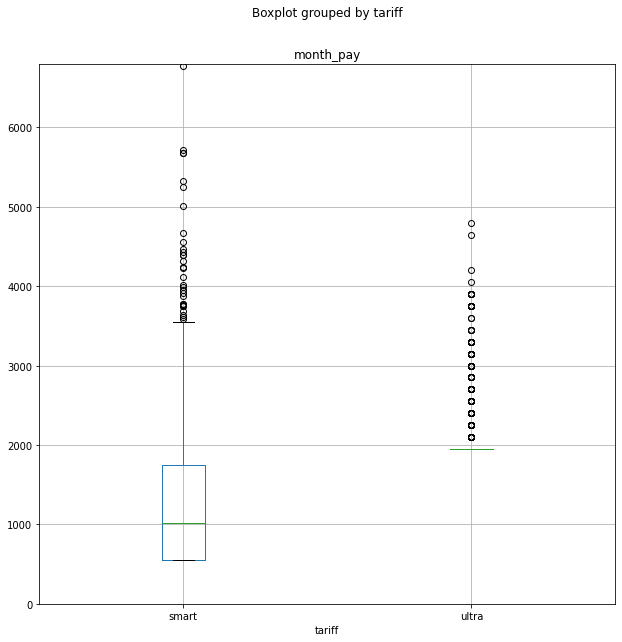

In [55]:
data.boxplot('month_pay', by='tariff', figsize=(10,10)).set_ylim(0,6800);


По тарифу **smart** видно, что в основном люди платят от 550 до 1600 руб в месяц. Но есть платежи выше 3000 руб, а один человек заплатил больше 6000р. Основная часть клиентов **ultra** укладывается в абонентскую плату, есть незначительное кол-во выбросов.

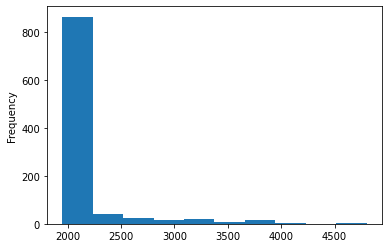

In [56]:
data[data['tariff'] == 'ultra']['month_pay'].plot(kind='hist', bins=10);

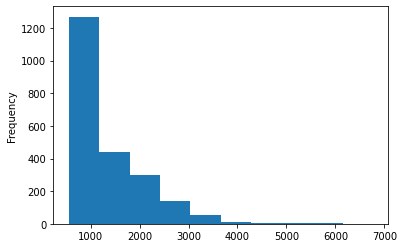

In [57]:
data[data['tariff'] == 'smart']['month_pay'].plot(kind='hist', bins=10);

**Вывод**\
По тарифу "Ultra" люди в основном платят по тарифу, и лишь немногочисленные группы выходят за пределы абонентской платы. Абоненты с тарифом "Smart" чаще выходят за границы своего тарифа. 

**Сравним поведение пользователей**

**ДЛИТЕЛЬНОСТЬ ЗВОНКОВ**

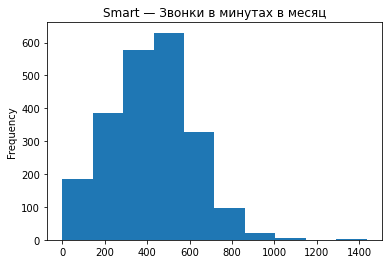

In [58]:
data[data['tariff'] == 'smart']['total_duration_calls'].plot(kind='hist', bins=10)
plt.title('Smart — Звонки в минутах в месяц');

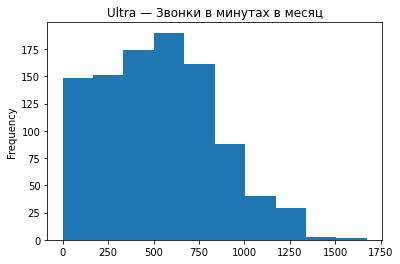

In [59]:
data[data['tariff'] == 'ultra']['total_duration_calls'].plot(kind='hist', bins=10)
plt.title('Ultra — Звонки в минутах в месяц');

Посмотрим на медиану, среднее, дисперсию и стандартное отклонение по времени звонков.

In [60]:
data.groupby('tariff')\
  .agg({'total_duration_calls':['median','mean','max','min','var','std']}) 

total_duration_calls                                   
                     median   mean   max min        var    std
tariff                                                        
smart                421.50 417.75  1435   0  36,281.39 190.48
ultra                518.00 526.09  1673   0 101,052.49 317.89

**Вывод**

Распределение в графике по тарифу "Smart" похоже на нормальное, пик около значения 500 мин. В графике "Ultra" значения распределились не так равномерно, есть много значений до 500 минут, а пик приходится около 600 минут. 

На "Smart" люди говорят в среднем около 420 минут, то есть подходят к краю своего тарифа, достаточно много абонентов выходят за пределы тарифа. А вот на "Ultra" люди в среднем разговаривают около 520 минут, то есть в запасе у них есть еще 2450 минут.
Медиана и среднее и там, и там примерно равны, значит, наверное, ничего экстремального нет.

**КОЛИЧЕСТВО СМС**

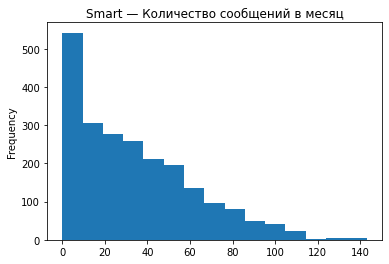

In [61]:
data[data['tariff'] == 'smart']['total_sms_in_month'].plot(kind='hist', bins=15)
plt.title('Smart — Количество сообщений в месяц');

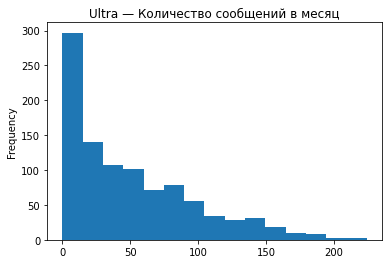

In [62]:
data[data['tariff'] == 'ultra']['total_sms_in_month'].plot(kind='hist', bins=15)
plt.title('Ultra — Количество сообщений в месяц');

In [63]:
data.groupby('tariff')\
  .agg({'total_sms_in_month':['median','mean','var','std']}) 

total_sms_in_month                     
                   median  mean      var   std
tariff                                        
smart                  28 33.37   796.96 28.23
ultra                  38 49.31 2,285.42 47.81

**Вывод**

Поведение пользователей выглядит похожим. Смс не особо пользуются спросом. Но если некоторые пользователи с тарифом "смарт" все же переходят лимит в 50 смс, то пользователи с тарифом "ультра" еле-еле переходят порог 200, при том что лимит смс в этом тарифе 1000 смс. Также в тарифе "ультра" больше разброс значений (дисперсия и стандартное отклонение выше, чем в "смарт").

**ИНТЕРНЕТ-ГБ в месяц**

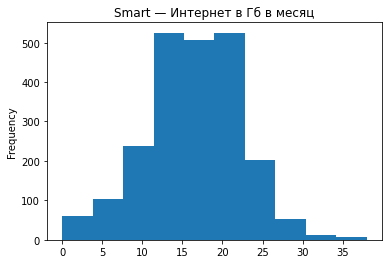

In [64]:
data[data['tariff'] == 'smart']['total_traffic_in_month'].plot(kind='hist', bins=10)
plt.title('Smart — Интернет в Гб в месяц');

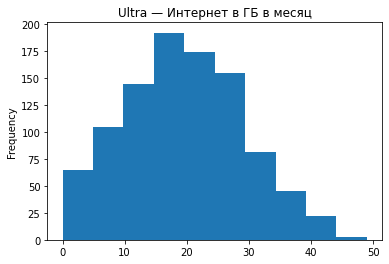

In [65]:
data[data['tariff'] == 'ultra']['total_traffic_in_month'].plot(kind='hist', bins=10)
plt.title('Ultra — Интернет в ГБ в месяц');

In [66]:
data.groupby('tariff')\
  .agg({'total_traffic_in_month':['median','mean','var','std']}) 

total_traffic_in_month                 
                       median  mean   var  std
tariff                                        
smart                   17.00 16.32 33.13 5.76
ultra                   19.00 19.47 97.38 9.87

**Вывод**

Среднее и медиана лежат рядом и там и там. На Смарте люди выходят за пределы тарифа (15ГБ) чаще, у  Ультры в основном пользователи остаются в рамках дозволенного интернета (30 Г), но и разброс больше (это видно и на графиках, и по значению std - стандартного отклонения).

**СРЕДНЯЯ ЕЖЕМЕСЯЧНАЯ ВЫРУЧКА**

In [67]:
data.groupby('tariff')\
  .agg({'month_pay':['median','mean']}) 

month_pay         
          median     mean
tariff                   
smart   1,021.00 1,289.64
ultra   1,950.00 2,070.03

**Вывод**\
Средняя ежемесячная выручка по тарифу "Смарт" составляет **1290р.**, по тарифу "Ультра" - **2070р**.

**ГОДОВАЯ ВЫРУЧКА**

In [68]:
data.groupby('tariff')['month_pay'].sum()

tariff
smart   2,875,901.00
ultra   2,041,050.00
Name: month_pay, dtype: float64

**Вывод**\
Годовая выручка с тарифа **Smart** составила 2 875 901р., годовая выручка с тарифа **Ultra** меньше - 2 041 050р.

**УШЕДШИЕ АБОНЕНТЫ**

Хочу еще проверить тех абонентов, которые ушли. 

In [69]:
users[~users['churn_date'].isna()].groupby('tariff')['user_id'].nunique()

tariff
smart    23
ultra    15
Name: user_id, dtype: int64

**Вывод**\
Ушедших с тарифа "Smart" больше, чем с "Ultra". 

<a id="hyp"></a>
## Проверка гипотез

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

**1. Гипотеза о равенстве средних двух генеральных совокупностей**

Сформулируем гипотезы:

    - H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.
    - H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сделаем 2 выборки, в одной будут пользователи с тарифом "Смарт", в другой - с тарифом "Ультра".

In [70]:
data_smart = data[data['tariff'] == 'smart']
data_ultra = data[data['tariff'] == 'ultra']

In [71]:
# Посмотрим на размер каждой выборки
display(data_smart.shape[0])
data_ultra.shape[0]

2230

986

Поскольку размеры этих 2 выборок отличаются значительно, при тесте установим значение equal_var равным False.

In [72]:
# Установим пороговое значение
alpha = 0.05

Будем сравнивать помесячную выручку.

In [73]:
smart = data_smart['month_pay']
ultra = data_ultra['month_pay']

In [74]:
results = st.ttest_ind(ultra, smart, equal_var=False)

In [75]:
display('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

1.927011394420941e-250

'Отвергаем нулевую гипотезу'

**Вывод**\
Отвергаем нулевую гипотезу, так как значение p-value намного меньше порогового значения. Такое маленькое значение p-value говорит о том, что разница не случайна, есть значимые различия между выборками.

**2. Гипотеза о равенстве средних двух генеральных совокупностей**

Сформулируем гипотезы:

    - H0: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
    - H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Посмотрим, какие значения есть в колонке **city**.

In [76]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Пермь', 'Сургут', 'Пенза',
       'Мурманск', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Оренбург', 'Магнитогорск', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Курган', 'Красноярск',
       'Владивосток', 'Смоленск', 'Владимир', 'Казань', 'Саратов',
       'Севастополь', 'Рязань', 'Екатеринбург', 'Стерлитамак',
       'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи', 'Вологда',
       'Чебоксары', 'Волжский', 'Чита', 'Петрозаводск', 'Хабаровск',
       'Ставрополь', 'Улан-Удэ', 'Курск', 'Якутск', 'Химки',
       'Владикавказ', 'Ижевск', 'Орёл', 'Белгород', 'Архангельск',
       'Липецк', 'Тамбов', 'Калининград', 'Новороссий

Заменим все названия населенных пунктов, кроме Москвы, словосочетанием "Другие регионы".

In [77]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Другие регионы')

Сделаем 2 выборки, в одной будут пользователи из Москвы, в другой - все остальные.

In [78]:
data_moscow = data[data['region'] == 'Москва']
data_regions = data[data['region'] == 'Другие регионы']

In [79]:
# Сравним размеры выборок
display(data_moscow.shape[0])
data_regions.shape[0]

611

2605

In [80]:
moscow = data_moscow['month_pay']
regions = data_regions['month_pay']

In [81]:
result = st.ttest_ind(moscow, regions, equal_var=False)

In [82]:
display('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.5216952110000278

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**\
Нулевую гипотезу не удалось опровергнуть. Можно сделать вывод, что выручка от абонентов Москвы, скорее всего, не отличается от выручки абонентов из других регионов.

<a id="end"></a>
## Общий вывод

- Люди на разных тарифах ведут себя по-разному, что наверно и хорошо.  Но и переплачивает достаточно много абонентов, а это, особенно в Смарте, может приводить к разочарованию и оттоку.
	    
- СМС-ками мало кто пользуется на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные запасы — возможно, стоит подумать, как использовать эту, по сути своей, упущенную выгоду.

- Интернетом не пользовались 3 клиента, звонками - 8 клиентов, сообщениями - 74 клиента. При этом 2 клиента (с id **1128** и **1371)** вообще не пользовались никакими услугами.

- 15 месяцев из 3216 условных месяцев клиенты не использовали интернет.

- Годовая выручка с тарифа **Smart** составила 2 875 901р., годовая выручка с тарифа **Ultra** меньше - 2 041 050р.
	   
- Тарифы приносят разные деньги, значимые различия есть. Средняя ежемесячная выручка по тарифу "Смарт" составляет **1290р.**, по тарифу "Ультра" - **2070р**.
	    
- Средняя выручка Москвы и регионов различается, вероятно, это связано с разным уровнем дохода.

- Всего за исследуемый период "ушедших" с тарифа "Смарт" - **23 пользователя**, с тарифа "Ультра" - **15**. Таким образом больше недовольных именно тарифом "Смарт", возможно, стоит с ними связаться, чтобы выяснить причины их ухода.  

- Ниже представлен график средней ежемесячной выручки в зависимости от тарифа. Видим, что на тарифе **Ultra** выручка особо не меняется и составляет суммы  в районе 2000р., тогда как выручка с тарифа **Smart** растет с каждым месяцем. Если в начале она составляла около 600 рублей, то к 12 месяцу выросла до 1600 р. Думаю, это связано с увеличением количества пользователей тарифа "Смарт". Все-таки пользователей больше привлекает недорогой тариф.


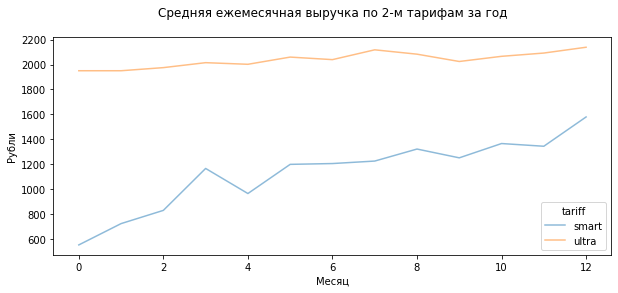

In [83]:
(data
 .pivot_table(index='tariff', columns='month', values='month_pay', aggfunc='mean')
 .T
 .plot(kind='line', alpha=0.5, figsize=(10,4))
)
plt.title('Средняя ежемесячная выручка по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');